In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
df = pd.read_csv('prepd-data-20y.csv')
df.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Region
0,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
1,4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,None,China
2,5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,None,China
3,14,4639,Ao Changrong,M,25.0,173.0,71.0,China,CHN,2008,Summer,Beijing,Hockey,Hockey Men's Hockey,None,China
4,16,6376,Ba Dexin,M,23.0,185.0,80.0,China,CHN,2014,Winter,Sochi,Curling,Curling Men's Curling,None,China


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49399 entries, 0 to 49398
Data columns (total 16 columns):
Unnamed: 0    49399 non-null int64
ID            49399 non-null int64
Name          49399 non-null object
Sex           49399 non-null object
Age           49399 non-null float64
Height        49399 non-null float64
Weight        49399 non-null float64
Team          49399 non-null object
NOC           49399 non-null object
Year          49399 non-null int64
Season        49399 non-null object
City          49399 non-null object
Sport         49399 non-null object
Event         49399 non-null object
Medal         49399 non-null object
Region        49399 non-null object
dtypes: float64(3), int64(3), object(10)
memory usage: 6.0+ MB


In [4]:
x = df[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event']].values
y = df['Medal'].values
print(x[:10])
print(y[:10])

[['M' 23.0 170.0 60.0 'CHN' 2012 'Summer' 'London' 'Judo'
  "Judo Men's Extra-Lightweight"]
 ['F' 14.0 168.0 54.0 'CHN' 2016 'Summer' 'Rio de Janeiro' 'Swimming'
  "Swimming Women's 200 metres Freestyle"]
 ['F' 14.0 168.0 54.0 'CHN' 2016 'Summer' 'Rio de Janeiro' 'Swimming'
  "Swimming Women's 4 x 200 metres Freestyle Relay"]
 ['M' 25.0 173.0 71.0 'CHN' 2008 'Summer' 'Beijing' 'Hockey'
  "Hockey Men's Hockey"]
 ['M' 23.0 185.0 80.0 'CHN' 2014 'Winter' 'Sochi' 'Curling'
  "Curling Men's Curling"]
 ['F' 19.0 164.0 59.0 'CHN' 2012 'Summer' 'London' 'Swimming'
  "Swimming Women's 200 metres Backstroke"]
 ['M' 26.0 173.0 66.0 'CHN' 2012 'Summer' 'London' 'Triathlon'
  "Triathlon Men's Olympic Distance"]
 ['M' 30.0 173.0 66.0 'CHN' 2016 'Summer' 'Rio de Janeiro' 'Triathlon'
  "Triathlon Men's Olympic Distance"]
 ['M' 19.0 173.0 70.0 'CHN' 2014 'Winter' 'Sochi' 'Speed Skating'
  "Speed Skating Men's 500 metres"]
 ['F' 19.0 165.0 53.0 'CHN' 2008 'Summer' 'Beijing' 'Athletics'
  "Athletics Wome

In [5]:
le_indices = [0, 4, 6, 7, 8, 9]
std_indices = [1, 2, 3, 5]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

std = StandardScaler()
x_std = std.fit_transform(x)

classes = np.unique(y)

ley = LabelEncoder()   
y = ley.fit_transform(y)

print(x_std[:10])
print(y[:10])

ley_name_mapping = dict(zip(classes, ley.transform(classes)))
print(ley_name_mapping)

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

[[ 8.83548237e-01 -5.41633996e-01 -5.36952000e-01 -7.27638710e-01
  -1.00312264e+00 -8.75608274e-03 -4.81363652e-01 -3.77583931e-01
   2.04266259e-01  1.72896428e-01]
 [-1.13180012e+00 -2.17247262e+00 -7.18761771e-01 -1.12091655e+00
  -1.00312264e+00  1.28434326e+00 -4.81363652e-01  4.30643324e-01
   1.17628716e+00  1.25778422e+00]
 [-1.13180012e+00 -2.17247262e+00 -7.18761771e-01 -1.12091655e+00
  -1.00312264e+00  1.28434326e+00 -4.81363652e-01  4.30643324e-01
   1.17628716e+00  1.29065961e+00]
 [ 8.83548237e-01 -1.79225413e-01 -2.64237343e-01 -6.62933586e-03
  -1.00312264e+00 -1.30185543e+00 -4.81363652e-01 -1.18581119e+00
   7.46634728e-02  1.40021041e-01]
 [ 8.83548237e-01 -5.41633996e-01  8.26621284e-01  5.83287425e-01
  -1.00312264e+00  6.37793590e-01  2.07743147e+00  1.23887058e+00
  -6.38151852e-01 -5.66799795e-01]
 [-1.13180012e+00 -1.26645116e+00 -1.08238131e+00 -7.93185017e-01
  -1.00312264e+00 -8.75608274e-03 -4.81363652e-01 -3.77583931e-01
   1.17628716e+00  1.23312768e+00

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [7]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(5),max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[    0     0   735     0]
 [    0     0   707     0]
 [    0     0 12709     0]
 [    0     0   669     0]]

Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       735
          1       0.00      0.00      0.00       707
          2       0.86      1.00      0.92     12709
          3       0.00      0.00      0.00       669

avg / total       0.74      0.86      0.79     14820


Accuracy: 0.858
CPU times: user 1.61 s, sys: 35.5 ms, total: 1.65 s
Wall time: 1.58 s


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
%%time
data = []
for i in range(1,100):
    mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=i, random_state=0)
    mlp.fit(x_train, y_train)
    y_pred = mlp.predict(x_test)
    error = mean_squared_error(y_test, y_pred)
    data.append([i, error])

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/l

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (37) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anacond

CPU times: user 4min 27s, sys: 8.86 s, total: 4min 35s
Wall time: 4min


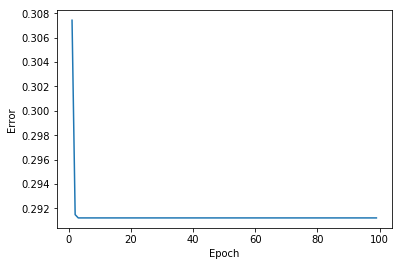

In [9]:
df_error = pd.DataFrame(data, columns = ['Epoch', 'Error'])
sb.lineplot(data=df_error, x='Epoch', y='Error')

In [10]:
df = df.loc[df.Medal!='None']

x = df[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event']].values
y = df['Medal'].values

le_indices = [0, 4, 6, 7, 8, 9]
std_indices = [1, 2, 3, 5]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

std = StandardScaler()
x_std = std.fit_transform(x)

classes = np.unique(y)

ley = LabelEncoder()   
y = ley.fit_transform(y)

ley_name_mapping = dict(zip(classes, ley.transform(classes)))
print(ley_name_mapping)

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

{'Bronze': 0, 'Gold': 1, 'Silver': 2}


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(5),max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[296 251 206]
 [229 294 167]
 [254 253 187]]

Classification Report:
             precision    recall  f1-score   support

          0       0.38      0.39      0.39       753
          1       0.37      0.43      0.40       690
          2       0.33      0.27      0.30       694

avg / total       0.36      0.36      0.36      2137


Accuracy: 0.364


In [12]:
%%time
data = []
for i in range(1,1000):
    mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=i, random_state=0)
    mlp.fit(x_train, y_train)
    y_pred = mlp.predict(x_test)
    error = mean_squared_error(y_test, y_pred)
    data.append([i, error])

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/l

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (37) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anacond

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (69) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (71) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (72) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anacond

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (103) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (104) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (105) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (106) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (136) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (137) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (138) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (139) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

CPU times: user 19min 50s, sys: 2.41 s, total: 19min 52s
Wall time: 19min 54s


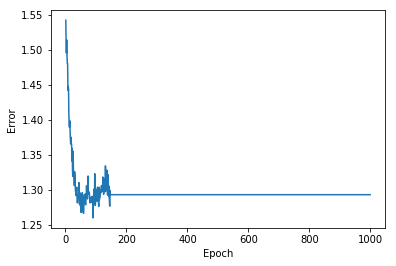

In [13]:
df_error = pd.DataFrame(data, columns = ['Epoch', 'Error'])
sb.lineplot(data=df_error, x='Epoch', y='Error')

In [14]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[379 155 219]
 [203 297 190]
 [180 142 372]]

Classification Report:
             precision    recall  f1-score   support

          0       0.50      0.50      0.50       753
          1       0.50      0.43      0.46       690
          2       0.48      0.54      0.50       694

avg / total       0.49      0.49      0.49      2137


Accuracy: 0.490
CPU times: user 15 s, sys: 6.29 s, total: 21.3 s
Wall time: 6.51 s


In [15]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(1000, 100, 50),max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[411 166 176]
 [181 348 161]
 [191 162 341]]

Classification Report:
             precision    recall  f1-score   support

          0       0.52      0.55      0.54       753
          1       0.51      0.50      0.51       690
          2       0.50      0.49      0.50       694

avg / total       0.51      0.51      0.51      2137


Accuracy: 0.515
CPU times: user 1min 8s, sys: 14.7 s, total: 1min 23s
Wall time: 22 s


In [16]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=1000, random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[399 346   8]
 [237 438  15]
 [309 373  12]]

Classification Report:
             precision    recall  f1-score   support

          0       0.42      0.53      0.47       753
          1       0.38      0.63      0.47       690
          2       0.34      0.02      0.03       694

avg / total       0.38      0.40      0.33      2137


Accuracy: 0.397
CPU times: user 2.56 s, sys: 113 ms, total: 2.68 s
Wall time: 2.55 s


In [17]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(100, 80, 60, 40, 20),max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[409 169 175]
 [198 341 151]
 [195 156 343]]

Classification Report:
             precision    recall  f1-score   support

          0       0.51      0.54      0.53       753
          1       0.51      0.49      0.50       690
          2       0.51      0.49      0.50       694

avg / total       0.51      0.51      0.51      2137


Accuracy: 0.511
CPU times: user 21.1 s, sys: 8.21 s, total: 29.3 s
Wall time: 8.85 s


In [18]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(1000, 500, 200, 100, 50),max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[408 183 162]
 [173 364 153]
 [153 171 370]]

Classification Report:
             precision    recall  f1-score   support

          0       0.56      0.54      0.55       753
          1       0.51      0.53      0.52       690
          2       0.54      0.53      0.54       694

avg / total       0.53      0.53      0.53      2137


Accuracy: 0.534
CPU times: user 4min 11s, sys: 42.2 s, total: 4min 53s
Wall time: 1min 16s


In [19]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000, 1000, 1000, 1000, 800, 500, 200, 100) ,max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[411 166 176]
 [170 375 145]
 [153 162 379]]

Classification Report:
             precision    recall  f1-score   support

          0       0.56      0.55      0.55       753
          1       0.53      0.54      0.54       690
          2       0.54      0.55      0.54       694

avg / total       0.55      0.55      0.55      2137


Accuracy: 0.545
CPU times: user 35min 19s, sys: 7min 25s, total: 42min 44s
Wall time: 12min 43s
